# 1.5.2 Harris Corner Detection

In [2]:
import cv2
import numpy as np

In [8]:
filename = 'check.jpg'
img = cv2.imread(filename)

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


### Corner with Subpixel Accuracy

In [15]:
filename = 'check.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [16]:
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [17]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [18]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [19]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('subpixel5.png',img)

In [21]:
# 1.5.3 Shi-Tomasi Corner Detector & Good Features to Track

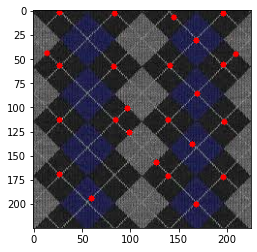

(<matplotlib.image.AxesImage at 0x2e5e88046d0>, None)

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('pattern2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

In [23]:
# 1.5.4 Indroduction to SIFT (Scale-Invariant Feature Transform)